<a href="https://colab.research.google.com/github/rrizwan98/Dr.-Dinish-/blob/main/high_risk_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [3]:
data=pd.read_csv('/content/high risk factor.csv')
data.head()

,Patie0t De1ographic age,Patie0t De1ographic ge0der,Associated 0actor 1ethotrexate,Associated 0actor 0SAID's,Associated 0actor Laxative,Associated 0actor Peptic ulcer,1edical histor1 Diabetic,1edical histor1 IBD,1edical histor1 Previous ca0cer,1edical histor1 Pa0creatitis,Unnamed: 10,0a1il1 histor1 Colorectal ca0cer,label
0,26,0,1,1,1,1,1,0,0,1,0,0,0
1,62,0,1,0,0,0,0,0,0,0,0,1,0
2,69,1,1,1,0,1,0,1,1,0,1,0,0
3,59,0,0,0,0,0,0,0,1,1,1,0,0
4,79,0,0,0,1,0,0,1,1,1,0,0,0


In [4]:

print("Number of cells with null values: " , data.isnull().sum().sum())

Number of cells with null values:  0


In [5]:
print("Number of cells with null values: " , data.isnull().sum().sum())

Number of cells with null values:  0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Patie0t De1ographic age           1293 non-null   int64
 1   Patie0t De1ographic ge0der        1293 non-null   int64
 2   Associated 0actor 1ethotrexate    1293 non-null   int64
 3   Associated 0actor 0SAID's         1293 non-null   int64
 4   Associated 0actor Laxative        1293 non-null   int64
 5   Associated 0actor Peptic ulcer    1293 non-null   int64
 6   1edical histor1 Diabetic          1293 non-null   int64
 7   1edical histor1 IBD               1293 non-null   int64
 8   1edical histor1 Previous ca0cer   1293 non-null   int64
 9   1edical histor1 Pa0creatitis      1293 non-null   int64
 10  Unnamed: 10                       1293 non-null   int64
 11  0a1il1 histor1 Colorectal ca0cer  1293 non-null   int64
 12  label                             

In [7]:
data.describe()

,Patie0t De1ographic age,Patie0t De1ographic ge0der,Associated 0actor 1ethotrexate,Associated 0actor 0SAID's,Associated 0actor Laxative,Associated 0actor Peptic ulcer,1edical histor1 Diabetic,1edical histor1 IBD,1edical histor1 Previous ca0cer,1edical histor1 Pa0creatitis,Unnamed: 10,0a1il1 histor1 Colorectal ca0cer,label
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,56.552204,0.432328,0.436968,0.228925,0.279196,0.239753,0.308585,0.252127,0.299304,0.239753,0.207270,0.242846,0.614076
std,16.858492,0.495591,0.496203,0.420303,0.448777,0.427098,0.462088,0.434402,0.458130,0.427098,0.405507,0.428969,0.487001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


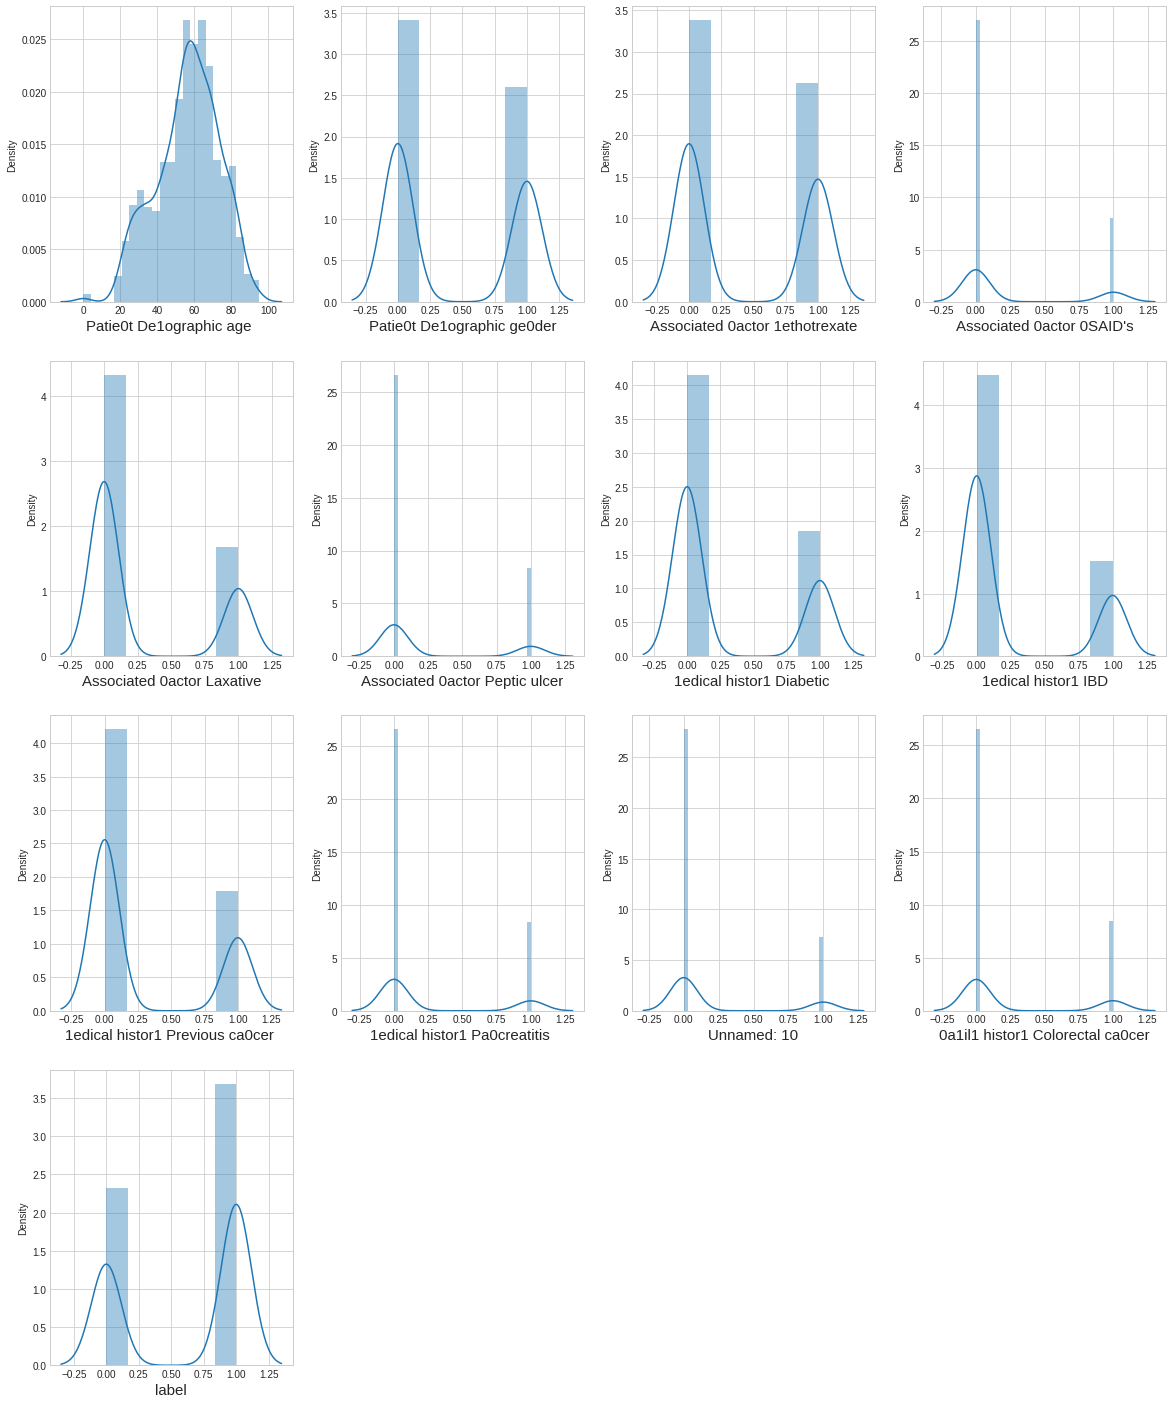

In [8]:
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in data:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

In [9]:
data["label"].value_counts()

1    794
0    499
Name: label, dtype: int64

In [10]:
# data shuffling frac=1 mean 100% shuffle 
data = data.sample(frac = 1)
data.head()

,Patie0t De1ographic age,Patie0t De1ographic ge0der,Associated 0actor 1ethotrexate,Associated 0actor 0SAID's,Associated 0actor Laxative,Associated 0actor Peptic ulcer,1edical histor1 Diabetic,1edical histor1 IBD,1edical histor1 Previous ca0cer,1edical histor1 Pa0creatitis,Unnamed: 10,0a1il1 histor1 Colorectal ca0cer,label
233,69,0,0,0,0,1,1,1,1,0,0,0,0
511,39,0,1,0,0,0,1,0,0,0,0,0,1
101,65,0,1,0,0,0,0,1,0,1,1,0,0
874,21,1,0,0,0,0,0,0,0,0,0,0,1
518,62,0,1,0,0,0,0,0,0,0,0,0,1


In [11]:

print("Number of cells with null values: " , data.duplicated().sum())

Number of cells with null values:  233


In [12]:
data[["Patie0t De1ographic ge0der","label"]].groupby(["Patie0t De1ographic ge0der"], as_index = False).mean()

,Patie0t De1ographic ge0der,label
0,0,0.611717
1,1,0.617174


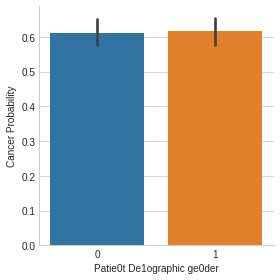

In [13]:
g = sns.factorplot(x = "Patie0t De1ographic ge0der", y = "label", data = data, kind = "bar", size = 4)
g.set_ylabels("Cancer Probability")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
# Models:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evolution:
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
X = data.drop(["label"], axis=1)
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42 ) #test-train data split - 20/80
#X_train[0:10]  #eğitim setinin ilk 10 satırı
print("X_train : ",len(X_train))
print("X_test : ",len(X_test))
print("y_train : ",len(y_train))
print("y_test : ",len(y_test))

X_train :  1034
X_test :  259
y_train :  1034
y_test :  259


In [16]:
print(X_train.shape)
print(X_test.shape)
print(X_train.values)

(1034, 12)
(259, 12)
[[59  0  0 ...  0  0  0]
 [74  1  0 ...  0  0  0]
 [36  0  1 ...  1  1  1]
 ...
 [33  0  1 ...  0  0  1]
 [70  0  1 ...  0  0  0]
 [30  0  0 ...  1  0  0]]


In [17]:
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
models = [("LR", LogisticRegression(max_iter=1000)),
          ("SVC", SVC()),
          ("KNC", KNeighborsClassifier(n_neighbors=10)),
          ("DTC", DecisionTreeClassifier()),
          ("GNB", GaussianNB()),
         ("SGDC", SGDClassifier()),
         ("Perc", Perceptron()),
          ("NC", NearestCentroid()),
          ("Ridge", RidgeClassifier()),
          ("BNB", BernoulliNB()),
          ("RF", RandomForestClassifier()),
          ("ADA", AdaBoostClassifier()),
          ("XGB", GradientBoostingClassifier()),
          ("PAC", PassiveAggressiveClassifier()) 
    
]

results = []
names=[]
finalresults=[]

for name, model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score= precision_score(y_test, model_results, average='macro')
    results.append(score)
    names.append(name)
    finalresults.append((name,score))
finalresults.sort(key=lambda k:k[1], reverse=True)
finalresults

[('XGB', 0.8986246672582077),
 ('RF', 0.8813850380916698),
 ('GNB', 0.8247559893522627),
 ('DTC', 0.808340727595386),
 ('BNB', 0.7972571050892268),
 ('LR', 0.7219202898550725),
 ('Ridge', 0.7219202898550725),
 ('ADA', 0.7131757254382088),
 ('SGDC', 0.7095238095238094),
 ('KNC', 0.6963141025641025),
 ('PAC', 0.6239771748492678),
 ('Perc', 0.5514705882352942),
 ('NC', 0.4878733572281959),
 ('SVC', 0.32432432432432434)]

In [19]:
# # Grid search and space:
# models_params= {
#     "RF":{'model':RandomForestClassifier(),
#          'params':{
#              'max_features': list(range(1,10)),
#              'n_estimators':[10,100,1000]
#          }}}

# # Evaluation:

# cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=20)

# # Search:
# scores=[]

# for model_name, params in models_params.items(): 
#     rs = RandomizedSearchCV(params['model'], params['params'], cv=cv , n_iter=10)
#     rs.fit(X_train,y_train)
#     scores.append([model_name,dict(rs.best_params_),rs.best_score_])
# data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
# data

In [20]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42,max_features= 3)

In [21]:
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=3, random_state=42)

In [22]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.1 degrees.


In [23]:
expected=y_test
print(predictions)
print(expected)

[1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1
 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1
 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0]
825     1
532     1
33      0
1200    1
427     0
       ..
90      0
932     1
665     1
880     1
600     1
Name: label, Length: 259, dtype: int64


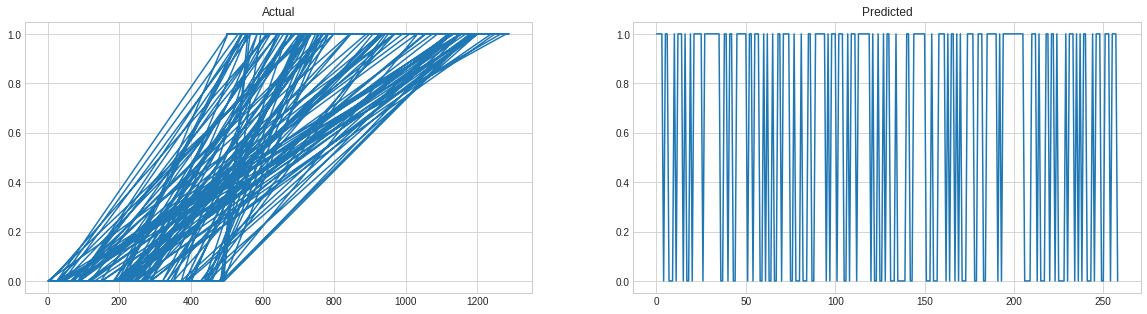

In [33]:
#subplots returns a Figure and an Axes object 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5)) 

#manipulating the first Axes 
ax[0].plot(expected)  
ax[0].set_title('Actual') 

#manipulating the second Axes 
ax[1].plot(predictions)  
ax[1].set_title('Predicted') 

#save and display the plot 
# plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_11.png',dpi=300,bbox_inches='tight') 
plt.show();